<a href="https://colab.research.google.com/github/stellargr/StatModeling_MSDS22/blob/main/carsalesinamerica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

### Name: Stella Voutsina hw2

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.formula.api import ols
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
# Importing the data
dataset = pd.read_csv("carseats.csv")
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
dataset.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

The dataset has 11 columns of which the first column (Sales) will be converted to a categorical feature (Class).

### Creating the Class Column from the Sales column

In [ ]:
# Create the class column from the sales column based on specified conditions
# if sales >= 8 then class = 1 else class = 0

dataset["Class"] = np.where(dataset["Sales"]>= 8, 1, 0)
dataset.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Class
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [ ]:
# Dropping the Sales column
dataset.drop("Sales", axis = 1, inplace = True)

### Preprocessing the Data

In [ ]:
# Checking for missing values
dataset.isna().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
Class          0
dtype: int64

The dataset has no missing values

In [ ]:
# Exploring the feature types
dataset.dtypes

CompPrice       int64
Income          int64
Advertising     int64
Population      int64
Price           int64
ShelveLoc      object
Age             int64
Education       int64
Urban          object
US             object
Class           int32
dtype: object

The features "ShelveLoc", "Urban", and "US" are all categorical features.

In [ ]:
# Checking the number of categories in the categorical variables
categorical_variables = ["ShelveLoc", "Urban", "US"]
for categorical_variable in categorical_variables:
    print(dataset[categorical_variable].value_counts())
    print()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

Yes    282
No     118
Name: Urban, dtype: int64

Yes    258
No     142
Name: US, dtype: int64



"ShelveLoc" has 3 categories - Bad, Medium and Good <br>
"Urban" has 2 categories - Yes, No <br>
"US" has 2 categories - Yes, No <br>

### One Hot Encoding the Categorical variables

In [ ]:
# Creating categorical variables using the pd.get_dummies() function
"""
    A temporary dataframe was created for the one hot encoded result so that
    the target variable "Class" can be added as the last column to follow conventions
"""
df = pd.get_dummies(dataset.iloc[:,:-1], columns = categorical_variables)
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [ ]:
# addint the target variable back to the dataframe
df["Class"] = dataset["Class"]
dataset = df
dataset.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Class
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,0
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,0


### Splitting the dataset into Training set and Test set

In [ ]:
# Splitting the dataset into the Training set and Test set
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)

### Scaling the dataset using Standard Scaler

In [ ]:
"""
    The scaler is used to fit and transform the training
    features but is only used to transform the test features
"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression Model

In [ ]:
# Building the Model
Log_classifier = LogisticRegression(random_state = 0)
Log_classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Checking the coefficient
Log_classifier.coef_

array([[ 1.82703054,  0.75338898,  1.5974275 , -0.24530023, -2.69490499,
        -0.88538669,  0.02804643, -1.16447434,  1.36732457, -0.14356288,
         0.14549114, -0.14549114,  0.21123434, -0.21123434]])

In [ ]:
# Checking the intercept
Log_classifier.intercept_

array([-1.03038644])

In [ ]:
# Checking the training accuracy
y_pred_train = Log_classifier.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print("The Logistic Regression model training accuracy is: ",round(accuracy1 * 100, 2),"%")

The Logistic Regression model training accuracy is:  91.79 %


In [ ]:
# Checking the test accuracy
y_pred = Log_classifier.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
print("The Logistic Regression model test accuracy is: ",round(accuracy1 * 100, 2),"%")

The Logistic Regression model test accuracy is:  88.33 %


The Logistic regression model has a 91.79% training accuracy and 88.33% test accuracy

### Using K Nearest Neighbors Classifier

In [ ]:
# Using Default KNN Classifier
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# Checking the training accuracy
y_pred_train = KNN_classifier.predict(X_train)
accuracy2 = accuracy_score(y_train, y_pred_train)
print("The default KNN model training accuracy is: ",round(accuracy2 * 100, 2),"%")

The default KNN model training accuracy is:  83.93 %


In [ ]:
# Checking the test accuracy
y_pred = KNN_classifier.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
print("The default KNN model test accuracy is: ",round(accuracy2 * 100, 2),"%")

The default KNN model test accuracy is:  64.17 %


The default KNN model has an 83.93% training accuracy and 64.17% test accuracy which is worse than the Logistic Regression model

#### Finding Optimal Value of K with Cross Validation

In [ ]:
# performing 5 fold cross validation on the different polynomial degrees of features
k_values = [3, 5, 7, 10, 15, 20, 25, 30]
KNN_models = []

for k in k_values:
    KNN_CV = cross_validate(KNeighborsClassifier(n_neighbors = k), X_train, y_train, cv=5, scoring='accuracy')
    KNN_models.append(KNN_CV)

#### Evaluating the cross validation model performances

In [ ]:
average_accuracies = []
for i in range(len(KNN_models)):
    result = KNN_models[i]["test_score"]
    average_accuracies.append(round(result.mean(), 4))
    print("Model", i+1,"(k =", k_values[i], "): ", result.round(2), "Average:", round(result.mean(), 4))

Model 1 (k = 3 ):  [0.86 0.7  0.73 0.73 0.8 ] Average: 0.7643
Model 2 (k = 5 ):  [0.79 0.66 0.79 0.71 0.79] Average: 0.7464
Model 3 (k = 7 ):  [0.75 0.75 0.75 0.71 0.77] Average: 0.7464
Model 4 (k = 10 ):  [0.79 0.71 0.79 0.73 0.77] Average: 0.7571
Model 5 (k = 15 ):  [0.8  0.71 0.84 0.75 0.77] Average: 0.775
Model 6 (k = 20 ):  [0.8  0.73 0.84 0.73 0.71] Average: 0.7643
Model 7 (k = 25 ):  [0.8  0.75 0.8  0.71 0.73] Average: 0.7607
Model 8 (k = 30 ):  [0.8  0.75 0.84 0.71 0.71] Average: 0.7643


#### Selecting the best model based on average cross validation accuracy score

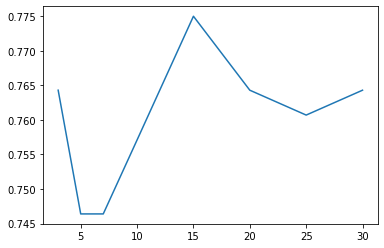

In [ ]:
plt.plot(k_values, average_accuracies)
plt.show()

From the values average cross validation accuracies above and the optimal K plot, we can see that the optimal value of k is 15

#### Refitting KNN with k = 15 on the entire training set

In [ ]:
# Using Default KNN Classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 15)
KNN_classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
# Checking the training accuracy
y_pred_train = KNN_classifier.predict(X_train)
accuracy3 = accuracy_score(y_train, y_pred_train)
print("The optimal KNN model training accuracy is: ",round(accuracy3 * 100, 2),"%")

The optimal KNN model training accuracy is:  81.43 %


In [ ]:
# Checking the test accuracy
y_pred = KNN_classifier.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred)
print("The optimal KNN model test accuracy is: ",round(accuracy3 * 100, 2),"%")

The optimal KNN model test accuracy is:  67.5 %


The optimal KNN model has an 81.43% training accuracy and 67.5% test accuracy which is still worse than the Logistic Regression model

### Conclusion / Comments

**Training Set**

| Model  | Accuracy |
| --- | --- |
|  Logistic Regression  | **91.79** |
|  Default KNN (k = 5)  | 83.93 |
|  Optimal KNN (k = 15)  | 81.43 |


**Test Set**

| Model  | Accuracy |
| --- | --- |
|  Logistic Regression  | **88.33** |
|  Default KNN (k = 5)  | 64.17 |
|  Optimal KNN (k = 15)  | 67.5 |

<br>
<br>
<br>
The logistic regression model outperformed the KNN classification models on this dataset. It had a higher training and testing accuracy.
The default KNN model performed better than the optimal KNN on the training set but was it had the least accuracy on the test set which makes the optimal KNN model a better model that the default KNN model as it has lower generalization error (i.e performs better on previously unseen data).